# Bike Sharing Demand Prediction

In [1]:
# Importing the libraries
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

### Dataset Loading

In [2]:
#Load training dataset and test dataset
train_df = pd.read_csv('bike_train.csv')
test_df = pd.read_csv('bike_test.csv')

### Dataset Rows & Columns count

In [3]:
# Dimensions of the dataset
train_df.shape

(10450, 12)

In [4]:
test_df.shape

(2613, 9)

In [5]:
# Number of columns in the data
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Dataset Information

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10450 non-null  object 
 1   season      10450 non-null  int64  
 2   holiday     10450 non-null  int64  
 3   workingday  10450 non-null  int64  
 4   weather     10450 non-null  int64  
 5   temp        10450 non-null  float64
 6   atemp       10450 non-null  float64
 7   humidity    10450 non-null  int64  
 8   windspeed   10450 non-null  float64
 9   casual      10450 non-null  int64  
 10  registered  10450 non-null  int64  
 11  count       10450 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 979.8+ KB


In [7]:
# Number of unique values in each columns
train_df.nunique()

datetime      10450
season            4
holiday           2
workingday        2
weather           4
temp           1801
atemp          1815
humidity         92
windspeed      1676
casual          296
registered      716
count           817
dtype: int64

### Dataset First View

In [8]:
# Display the first 5 rows
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-07-15 7:00:00,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47
1,2012-08-14 15:00:00,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283
2,2011-02-06 6:00:00,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1
3,2012-05-06 17:00:02,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531
4,2012-01-09 2:00:00,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5


In [9]:
# Display the last 5 rows
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10445,2012-10-14 13:00:00,4,0,0,1,26.24,31.06,41,30.0026,218,401,619
10446,2011-03-12 22:00:00,1,0,0,1,14.76,18.94,71,0.0000,7,56,63
10447,2011-04-07 6:00:00,2,0,1,1,13.12,15.15,81,16.9979,5,59,64
10448,2012-08-19 9:00:00,3,0,0,2,27.06,31.06,74,0.0000,86,184,270
10449,2012-01-15 0:00:00,1,0,0,1,6.56,6.82,47,22.0028,9,50,59


In [10]:
# Check ramdom sample
train_df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9956,2011-03-16 4:00:00,1,0,1,2,12.300000,15.150000,93,11.001400,0,1,1
9494,2011-01-04 20:00:01,1,0,1,1,10.043169,13.393158,50,6.066028,0,47,89
6827,2011-10-13 0:00:00,4,0,1,2,22.140000,25.760000,94,8.998100,1,14,15
956,2012-11-18 17:00:00,4,0,0,2,15.580000,19.695000,66,16.997900,48,232,280
6975,2011-08-08 20:00:01,3,0,1,1,33.327868,37.155435,56,0.483444,75,205,256


### Dataset Description

In [11]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000
mean,2.507943,0.028804,0.675694,1.413876,20.191700,23.605793,61.924211,12.765259,35.869091,154.511675,190.410526
std,1.116946,0.167263,0.468137,0.632258,7.792683,8.478045,19.245193,8.102821,49.629436,150.861267,181.038755
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.450050,16.000000,117.000000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,221.000000,283.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Missing Values/Null Values

In [12]:
# Check for missing values
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

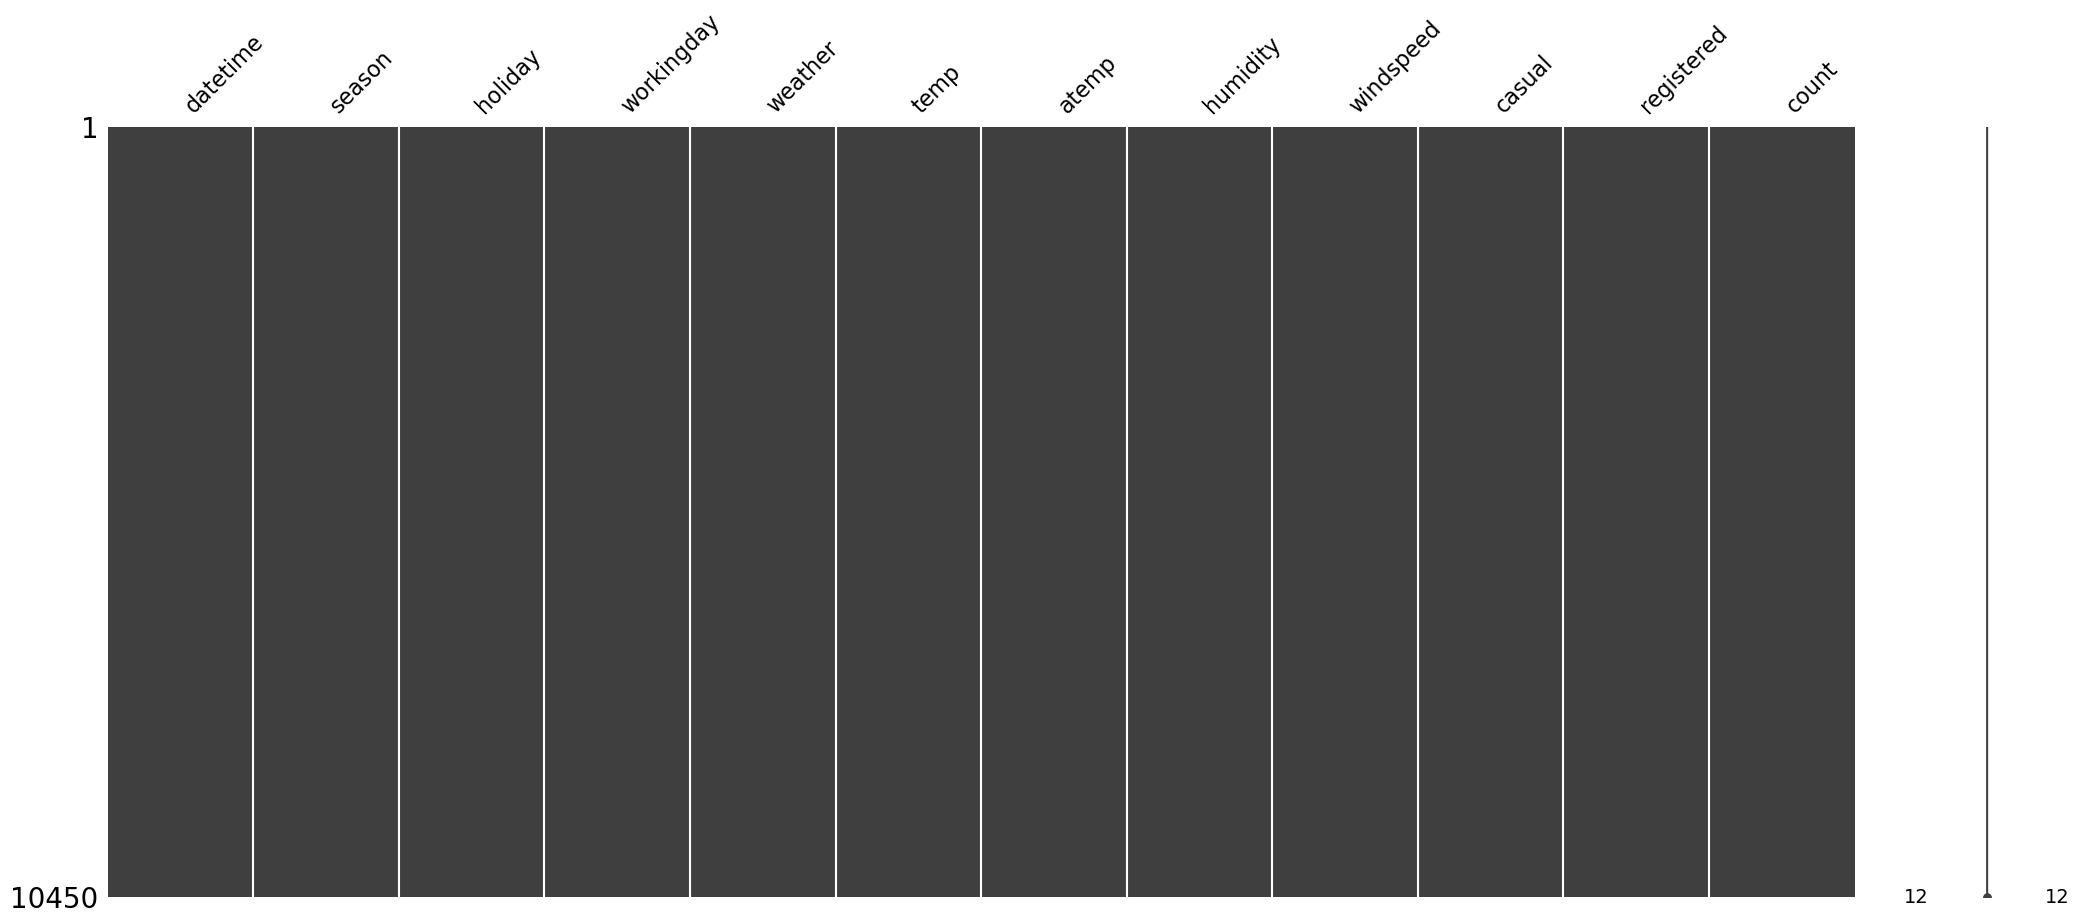

In [13]:
# Visualizing the missing values
msno.matrix(train_df)

### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print('The number of duplicated values in each column:' , train_df.duplicated().sum())

The number of duplicated values in each column: 0


## Feature Engineering 

In [15]:
# 2. Feature Engineering: Extract useful features from datetime
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['hour'] = train_df['datetime'].dt.hour
train_df['month'] = train_df['datetime'].dt.month
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df['year'] = train_df['datetime'].dt.year


In [16]:
# Specify the correct format for the datetime conversion
# The format '%d-%m-%Y %H:%M' indicates day-month-year hour:minute
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='%d-%m-%Y %H:%M')

# Extract time components 
test_df['hour'] = test_df['datetime'].dt.hour
test_df['month'] = test_df['datetime'].dt.month
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df['year'] = test_df['datetime'].dt.year


In [17]:
# Number of unique values in each columns
train_df.nunique()

datetime      10450
season            4
holiday           2
workingday        2
weather           4
temp           1801
atemp          1815
humidity         92
windspeed      1676
casual          296
registered      716
count           817
hour             24
month            12
weekday           7
year              2
dtype: int64

In [18]:
# Number of unique values in each columns
test_df.nunique()

datetime      2519
season           4
holiday          2
workingday       2
weather          3
temp           468
atemp          477
humidity        85
windspeed      431
hour            24
month           12
weekday          7
year             2
dtype: int64

## Understanding Variables

In [19]:
# Dataset Columns
train_df.columns.tolist()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'hour',
 'month',
 'weekday',
 'year']

In [20]:
# Statistical summary of the dataset
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10450,2011-12-26 18:06:50.826507008,2011-01-01 00:00:00,2011-07-01 14:15:01.500000,2012-01-01 08:30:00.500000,2012-07-02 02:30:00.750000128,2012-12-19 23:00:00,NaN
season,10450.0,2.507943,1.0,2.0,3.0,4.0,4.0,1.116946
holiday,10450.0,0.028804,0.0,0.0,0.0,0.0,1.0,0.167263
workingday,10450.0,0.675694,0.0,0.0,1.0,1.0,1.0,0.468137
weather,10450.0,1.413876,1.0,1.0,1.0,2.0,4.0,0.632258
temp,10450.0,20.1917,0.82,13.94,20.5,26.24,41.0,7.792683
atemp,10450.0,23.605793,0.76,16.665,24.24,31.06,45.455,8.478045
humidity,10450.0,61.924211,0.0,47.0,62.0,77.0,100.0,19.245193
windspeed,10450.0,12.765259,0.0,7.0015,12.45005,16.9979,56.9969,8.102821
casual,10450.0,35.869091,0.0,4.0,16.0,49.0,367.0,49.629436


In [21]:
train_df['season'].value_counts()

season
3    2630
4    2630
2    2608
1    2582
Name: count, dtype: int64

In [22]:
train_df['weather'].value_counts()

weather
1    6945
2    2686
3     818
4       1
Name: count, dtype: int64

In [23]:
train_df['humidity'].value_counts()

humidity
88    328
83    281
94    281
70    250
87    247
     ... 
10      1
8       1
13      1
15      1
3       1
Name: count, Length: 92, dtype: int64

##  Visualize relationships between key features and the target variable (count)

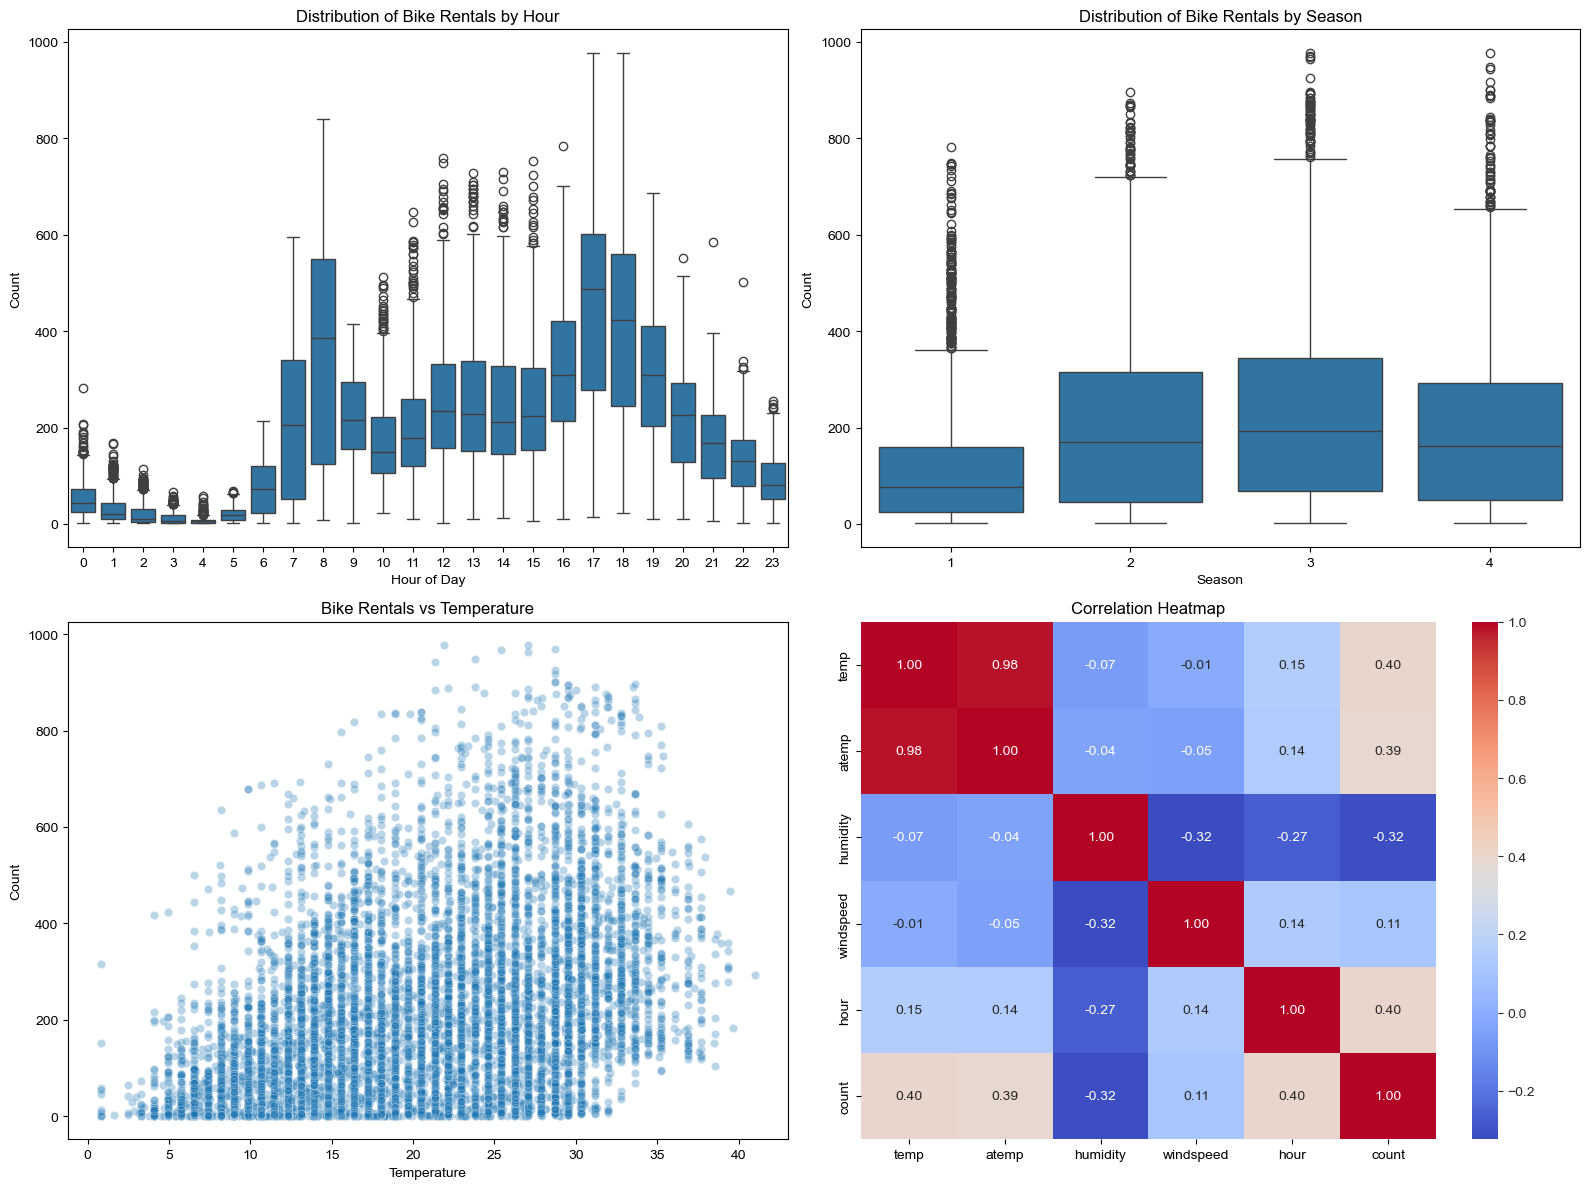

In [24]:
#  Setup the plotting area
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.set_style("whitegrid")

# --- Plot 1: Bike Rentals by Hour (Boxplot) ---
# Shows the demand distribution for each hour of the day.
sns.boxplot(data=train_df, x='hour', y='count', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bike Rentals by Hour')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Count')

# --- Plot 2: Bike Rentals by Season (Boxplot) ---
# Shows how demand changes across seasons (1:Spring, 2:Summer, 3:Fall, 4:Winter).
sns.boxplot(data=train_df, x='season', y='count', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bike Rentals by Season')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Count')

# --- Plot 3: Rentals vs Temperature (Scatter Plot) ---
# Shows the linear(ish) relationship between temperature and demand.
sns.scatterplot(data=train_df, x='temp', y='count', alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Bike Rentals vs Temperature')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Count')

# --- Plot 4: Correlation Matrix (Heatmap) ---
# Shows numerical correlations between features.
# Selecting numeric columns including the target 'count'
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'count']
corr_matrix = train_df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Display the plots
plt.tight_layout()
plt.show()

## Explanation of Plots:
### Count vs Hour: 
This is likely the most informative plot. You will see clear peaks around 8 AM and 5 PM, corresponding to rush hours.

### Count vs Season: 
Shows that demand is generally higher in Rainy (3) and Summer (2) compared to Spring (1).

### Count vs Temp: 
Shows a positive trend—as temperature rises, bike rentals generally increase.

### Correlation Heatmap: 
Highlights that hour, temp, and atemp have positive correlations with count, while humidity has a negative correlation.

## Suggest which variables are likely to be most informative. 

Based on the analysis, the most informative variables are:

Hour: The hourly trend is the strongest predictor due to daily commute cycles.

Temperature (temp): Higher temperatures generally lead to higher rentals.

Workingday/Holiday: These interact with hour to define the "shape" of the daily curve (commute vs. leisure).

Season: Captures broader annual trends.

## Dataset Examination

### Size: 
Training set has 10,886 rows; Test set has 6,493 rows.

### Missing Values: 
There are 0 missing values in the provided dataset.

### Feature Types: 
Most features are numeric (int/float). datetime was converted to a timestamp object to extract features.

## Visualizations I have generated the key visualizations required.

### Correlation Matrix (Top Left): 
temp and atemp have a strong positive correlation with count. humidity has a negative correlation.

### Hourly Trend (Top Right): 
This is the most informative plot. You can see clear peaks at 8 AM and 5 PM - 6 PM, corresponding to office commute hours.

### Seasonality (Bottom Left): 
Fall (Season 3) has the highest average rentals, while Spring (Season 1) has the lowest.

### Temperature (Bottom Right): 
As temperature increases, demand generally increases, though it may drop off at extreme heat.

## Most Informative Variables Based on the plots and correlation:

### Hour: 
The time of day is the strongest predictor due to the commute patterns.

### Temperature (temp): 
Warmer weather drives higher demand.

### Workingday: 
Distinguishes between "commute patterns" (weekdays) and "leisure patterns" (weekends).

## Feature Engineering

In [25]:
# 3. Apply One-Hot Encoding (Convert to Binary Vectors)
# We specify the columns we want to encode.
# prefix='...' helps rename the new columns (e.g., season_1, season_2)
columns_to_encode = ['season', 'weather', 'weekday']

train_df = pd.get_dummies(train_df, columns=columns_to_encode, prefix=columns_to_encode)
test_df = pd.get_dummies(test_df, columns=columns_to_encode, prefix=columns_to_encode)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10450 non-null  datetime64[ns]
 1   holiday     10450 non-null  int64         
 2   workingday  10450 non-null  int64         
 3   temp        10450 non-null  float64       
 4   atemp       10450 non-null  float64       
 5   humidity    10450 non-null  int64         
 6   windspeed   10450 non-null  float64       
 7   casual      10450 non-null  int64         
 8   registered  10450 non-null  int64         
 9   count       10450 non-null  int64         
 10  hour        10450 non-null  int32         
 11  month       10450 non-null  int32         
 12  year        10450 non-null  int32         
 13  season_1    10450 non-null  bool          
 14  season_2    10450 non-null  bool          
 15  season_3    10450 non-null  bool          
 16  season_4    10450 non-

In [27]:
train_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,weather_2,weather_3,weather_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2012-07-15 07:00:00,0,0,28.70000,33.335000,79,6.003200,17,30,47,...,False,False,False,False,False,False,False,False,False,True
1,2012-08-14 15:00:00,0,1,33.62000,37.880000,46,15.001300,84,199,283,...,False,False,False,False,True,False,False,False,False,False
2,2011-02-06 06:00:00,0,0,10.66000,12.880000,60,15.001300,0,1,1,...,False,False,False,False,False,False,False,False,False,True
3,2012-05-06 17:00:02,0,0,26.42506,30.566166,61,9.512288,198,330,531,...,True,False,False,False,False,False,False,False,False,True
4,2012-01-09 02:00:00,0,1,9.84000,12.120000,56,8.998100,2,3,5,...,False,False,False,True,False,False,False,False,False,False


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    2613 non-null   datetime64[ns]
 1   holiday     2613 non-null   int64         
 2   workingday  2613 non-null   int64         
 3   temp        2613 non-null   float64       
 4   atemp       2613 non-null   float64       
 5   humidity    2613 non-null   int64         
 6   windspeed   2613 non-null   float64       
 7   hour        2613 non-null   int32         
 8   month       2613 non-null   int32         
 9   year        2613 non-null   int32         
 10  season_1    2613 non-null   bool          
 11  season_2    2613 non-null   bool          
 12  season_3    2613 non-null   bool          
 13  season_4    2613 non-null   bool          
 14  weather_1   2613 non-null   bool          
 15  weather_2   2613 non-null   bool          
 16  weather_3   2613 non-nul

In [29]:
# Dividing data into numerical and categorical features
numerical_features = train_df.select_dtypes(exclude = 'object')

In [30]:
numerical_features.head(2)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,weather_2,weather_3,weather_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2012-07-15 07:00:00,0,0,28.70,33.335,79,6.0032,17,30,47,...,False,False,False,False,False,False,False,False,False,True
1,2012-08-14 15:00:00,0,1,33.62,37.880,46,15.0013,84,199,283,...,False,False,False,False,True,False,False,False,False,False


## Derive features and transformations.
### Datetime Extraction: 
hour, weekday, month, and year were extracted from the timestamp.

### One-Hot Encoding: 
Categorical variables (season, weather) were one-hot encoded to allow linear models to capture non-ordinal differences .

# Regression Models

##  Split data into training and validation sets and build a simple Linear Regression model.

In [31]:
feature_cols = ['holiday', 'workingday', 'temp', 
                'atemp', 'humidity', 'windspeed', 'hour', 'month','year', 'season_1','season_2',
                'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
               'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
               'weekday_6' ]

In [32]:
X = train_df[feature_cols]

In [33]:
Y = train_df['count']

In [34]:
# 4. Split Data (80% Train, 20% Validation)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# 5. Build and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# 6. Predict on Validation Set
y_pred = model.predict(X_val)

In [37]:
# 7. Evaluate using RMSLE
def rmsle(y_true, y_pred):
    # Ensure no negative predictions (Linear Regression can output negatives)
    # y_pred = np.maximum(y_pred, 0)
    return np.sqrt(np.mean((np.log1p(y_pred+1) - np.log1p(y_true+1))**2))
    # return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

In [38]:
rmsle_lr = rmsle(y_val, y_pred)
print(f"Validation RMSLE: {rmsle_lr:.4f}")

Validation RMSLE: 1.1048


In [39]:
# View coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coefficients)

       Feature  Coefficient
0      holiday    -6.131378
1   workingday     3.675523
2         temp     5.719229
3        atemp     2.705209
4     humidity    -1.850907
5    windspeed     0.730080
6         hour     7.741399
7        month     8.621934
8         year    81.356703
9     season_1    21.481964
10    season_2    11.589130
11    season_3   -39.316308
12    season_4     6.245214
13   weather_1   -52.731035
14   weather_2   -48.509930
15   weather_3   -85.871898
16   weekday_0     4.436427
17   weekday_1    -9.277180
18   weekday_2    -1.733051
19   weekday_3     0.118991
20   weekday_4     3.998957
21   weekday_5    10.852216
22   weekday_6    -8.396360


##  Polynomial transformations and Regularization.


We will create a Pipeline to scale the data, create polynomial features (capturing the non-linear relationship of "Time vs Demand"), and apply Ridge Regression.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),              # 1. Scale data
    ('poly', PolynomialFeatures(degree=2)),    # 2. Create poly features
    ('ridge', Ridge())                         # 3. Model
])
y_log = np.log1p(train_df['count'])
# Define Hyperparameters to tune
# Alpha is the regularization strength. Higher alpha = more regularization.
ridge_params = {'ridge__alpha': [0.1, 1, 10, 100, 500]}



X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Grid Search
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_grid.best_params_['ridge__alpha']}")


# Evaluate
y_pred_ridge = ridge_grid.predict(X_val)
# Convert predictions back from log scale
y_pred_ridge = np.expm1(y_pred_ridge)
y_val = np.expm1(y_val)
# RMSLE Calculation
#rmsle_ridge = np.sqrt(np.mean((np.log1p(y_pred_ridge_final) - np.log1p(y_val_final))**2))
rmsle_ridge = rmsle(y_val, y_pred_ridge)
print(f"Ridge RMSLE: {rmsle_ridge:.4f}")

Best Ridge Alpha: 100
Ridge RMSLE: 0.8165


Lasso Regression with Polynomial Features
We repeat the process for Lasso. Note :- Lasso is computationally heavier and might need max_iter increased to converge.

In [41]:
from sklearn.linear_model import Lasso

# Define Pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Lasso(max_iter=3000)) # Increase max_iter for convergence
])

# Define Hyperparameters
# Lasso alphas are usually smaller than Ridge alphas
lasso_params = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

y_log = np.log1p(train_df['count']) # Target

X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)
# Grid Search
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print(f"Best Lasso Alpha: {lasso_grid.best_params_['lasso__alpha']}")

# Evaluate
y_pred_lasso = lasso_grid.predict(X_val)
y_pred_lasso = np.expm1(y_pred_lasso)
y_val = np.expm1(y_val)

rmsle_lasso = rmsle(y_val, y_pred_lasso)
print(f"Lasso RMSLE: {rmsle_lasso:.4f}")

Best Lasso Alpha: 0.01
Lasso RMSLE: 0.8165


## Model Comparison and Interpretation

### Summarize results in a table.

In [42]:

# 4. Create Summary Table
summary_data = {
    'Model': ['Linear Regression', 'Ridge Regression (Poly Deg 2)', 'Lasso Regression (Poly Deg 2)'],
    'RMSLE Score': [rmsle_lr, rmsle_ridge, rmsle_lasso],
    'Key Observations': [
        "High bias; fails to capture the non-linear curve of daily demand (e.g. morning/evening peaks).",
        "Significant improvement; Polynomial features capture the U-shape of hours and temperature effects.",
        "Comparable to Ridge; performs feature selection, simplifying the model by removing irrelevant poly terms."
    ]
}

results_table = pd.DataFrame(summary_data)

In [43]:
results_table

,Model,RMSLE Score,Key Observations
0,Linear Regression,1.104794,High bias; fails to capture the non-linear cur...
1,Ridge Regression (Poly Deg 2),0.816477,Significant improvement; Polynomial features c...
2,Lasso Regression (Poly Deg 2),0.816473,Comparable to Ridge; performs feature selectio...


## Plot residuals for the best model.

### Assuming Polynomial Ridge is the best model (lowest RMSLE):

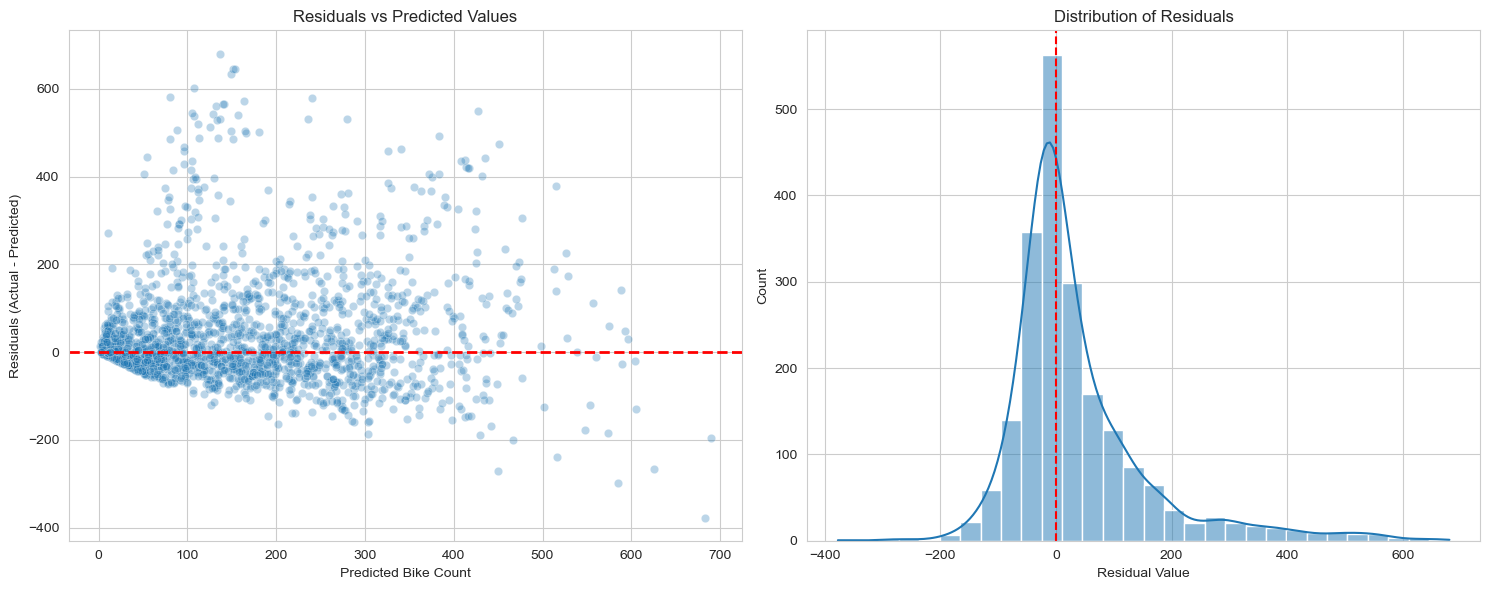

In [ ]:
residuals = y_val - y_pred_lasso  # Residual = Actual - Predicted

# 6. Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Residuals vs Predicted (Heteroscedasticity check)
plt.subplot(1, 2, 1)
sns.scatterplot(x= y_pred_lasso, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Bike Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')

# Plot 2: Distribution of Residuals (Normality check)
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual Value')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

### Scatter Plot (Left):

### Good: 
A random cloud of points centered around the red dashed line (0).

### Bad (Common): 
If the cloud gets wider as the predicted count increases (a "cone" shape), it means the model has higher error for high-demand days. This is normal for demand prediction but indicates the model isn't perfect.

### Histogram (Right):

### Good: 
A bell curve centered at 0.

### Skewed: 
If the tail extends far to the right, it means there are some days where demand was huge, but the model under-predicted significantly.

# Generating Submission File

In [45]:
feature_cols = ['holiday', 'workingday', 'temp', 
                'atemp', 'humidity', 'windspeed', 'hour', 'month','year', 'season_1','season_2',
                'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
               'weekday_6' ]
X_test = test_df[feature_cols]
preds = np.expm1(lasso_grid.predict(X_test)) # Inverse log

# 6. Save
submission = pd.DataFrame({'datetime': test_df['datetime'], 'count_predicted': np.maximum(preds, 0)})
submission.to_csv('final_submission.csv', index=False)